***Course:*** Introduction To Data Science - Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_predict

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_excel("ENB2012_data.xlsx")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# Data preparation:

1. Perform exploratory data analysis (EDA) to understand the distribution of variables,
identify outliers, and check for missing values.
2. Visualize the relationships between the independent variables and the target variable
using appropriate plots.
3. If necessary, perform feature selection or transformation to enhance the quality of
input variables.


In [3]:
#renaming columns:
df.rename(columns ={
    "X1":"RelativeCompactness" ,
    "X2":"SurfaceArea",
    "X3":"WallArea",
    "X4":"RoofArea",
    "X5":"OverallHeight",
    "X6":"Orientation",
    "X7":"GlazingArea",
    "X8":"GlazingAreaDistribution",
    "Y1":"HeatingLoad",
    "Y2":"CoolingLoad"
}, inplace = True)

In [4]:
df

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


# Scaling wiht min/max

In [5]:
#scaling before to not affect the covarance and correlation
#the variables are on different "scales" ex annual income is much higher then age and spending score.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


features = ["RelativeCompactness","SurfaceArea","WallArea","RoofArea","OverallHeight",
            "Orientation","GlazingArea","GlazingAreaDistribution","HeatingLoad","CoolingLoad"]

for feature in features:
    transform = scaler.fit_transform(df[[feature]])
    df[feature] = transform

df

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085
...,...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.320032,0.282790
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.283904,0.161056
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.281208,0.167250
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.282286,0.153784


## What is heatload

Just to get a better understanding of the data. 

Heat loading is the amout of heat energy that would need to be added to a space for it to maintain the temperatur in an accaptable range.

Cooling load is the amout of heat energy that would be needed to be removed from space (cooling) to maintain the temperature in an acceptable range. 

Thus, higher heat load must therefore mean that we would require more heat energy to be added to a space to maintaine the temperature,

and higher heat cooling must mean that we would require to take out more heat energy to maintane the temperature.


In [6]:
df.describe()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.500000,0.585938,0.562500,0.439396,0.368644
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.372921,0.333051,0.310192,0.272046,0.256216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.250000,0.350000,0.188258,0.127121
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.500000,0.625000,0.600000,0.348881,0.301104
75%,0.583333,0.770833,0.571429,1.000000,1.000000,0.750000,1.000000,0.800000,0.691763,0.598775
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: title={'center': 'Boxplot of each independent variable and target variable'}>

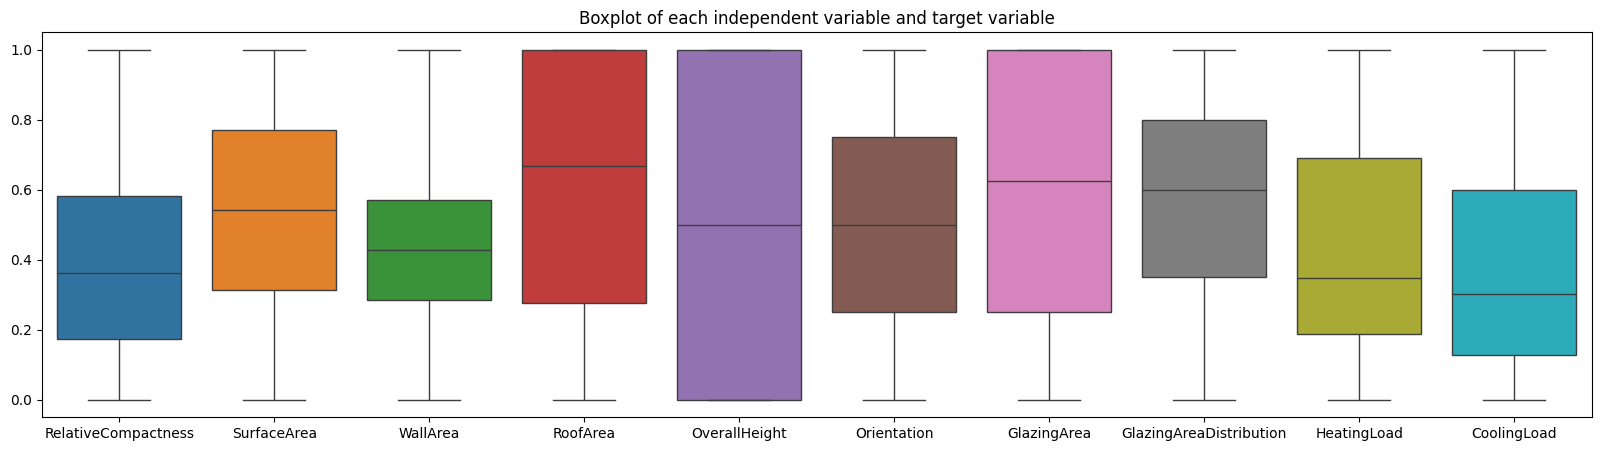

In [7]:
plt.figure(figsize=(20,5))
plt.title("Boxplot of each independent variable and target variable")
sns.boxplot(df)

In [8]:
#check for missing values
print(df.count())
print("")
print(df.isnull().sum())
print("")

RelativeCompactness        768
SurfaceArea                768
WallArea                   768
RoofArea                   768
OverallHeight              768
Orientation                768
GlazingArea                768
GlazingAreaDistribution    768
HeatingLoad                768
CoolingLoad                768
dtype: int64

RelativeCompactness        0
SurfaceArea                0
WallArea                   0
RoofArea                   0
OverallHeight              0
Orientation                0
GlazingArea                0
GlazingAreaDistribution    0
HeatingLoad                0
CoolingLoad                0
dtype: int64



In [9]:
#check duplicated values
duplicated = df[df.duplicated()]
duplicated.count()

RelativeCompactness        0
SurfaceArea                0
WallArea                   0
RoofArea                   0
OverallHeight              0
Orientation                0
GlazingArea                0
GlazingAreaDistribution    0
HeatingLoad                0
CoolingLoad                0
dtype: int64

In [10]:
df.var()

RelativeCompactness        0.086334
SurfaceArea                0.089768
WallArea                   0.064710
RoofArea                   0.167828
OverallHeight              0.250326
Orientation                0.139070
GlazingArea                0.110923
GlazingAreaDistribution    0.096219
HeatingLoad                0.074009
CoolingLoad                0.065647
dtype: float64

<AxesSubplot: >

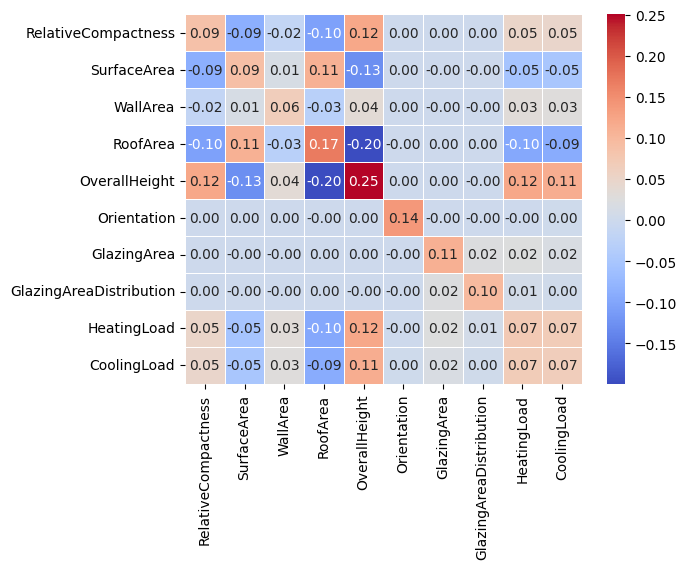

In [11]:
# heatmap with cov
sns.heatmap(df.cov(), cmap="coolwarm", annot = True, fmt=".2f", linewidths=.5 )

From the covariance matrix can we see that some values seems to have a positive covariance for the target values. 

The positives for both target values are:
    
    - Relative compactness.
    - Wall Area.
    - OverallHeigt.
    - Glazing Area.
    - Glazing Area Distribution.
Thus almost every indpendent variable has a positive covariance with the target value. 

The negative variables are:
    
    - Surface Area.
    - Roof Area. 

Orientation is positive for cooling load and negative for heat load. 

It also seems that heatingload and coolingload has some covariance between each other. 

<AxesSubplot: >

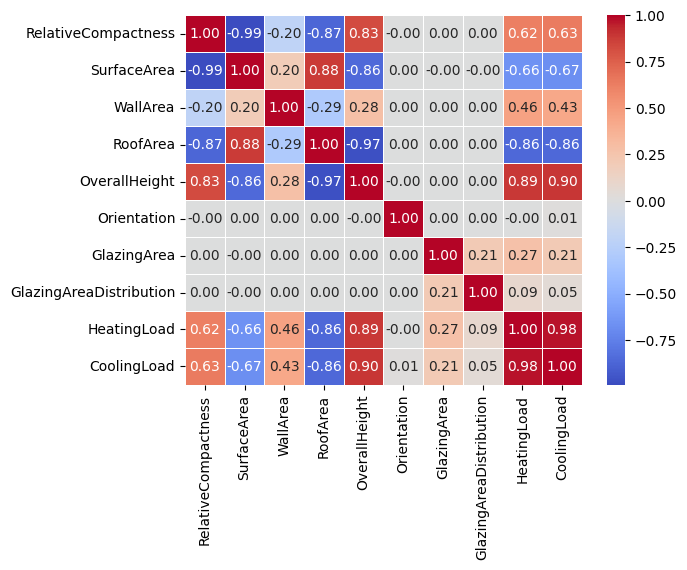

In [28]:
#correlation heatmap
sns.heatmap(df.corr(), cmap="coolwarm", annot = True, fmt=".2f", linewidths=.5 )

Can see that the correlation is high for some variables:

    - Relative compactness.
    - Overall Height.
    - Wall area.

But also samller values for:
    
    - Glazing area. 
    - Glazing area distribution.
    - Orientation

The large negative variables are:
    
    - Surface area.
    - Roof area. 

The two independent variables, heatingload and coolingload does also correlate to each other and has a high correlation, almost 1. 

## Scatterplots

These are used to get a better understanding of the linear relationship between the target values and the independent values.

### Scatterplots for values with high correlation to target values

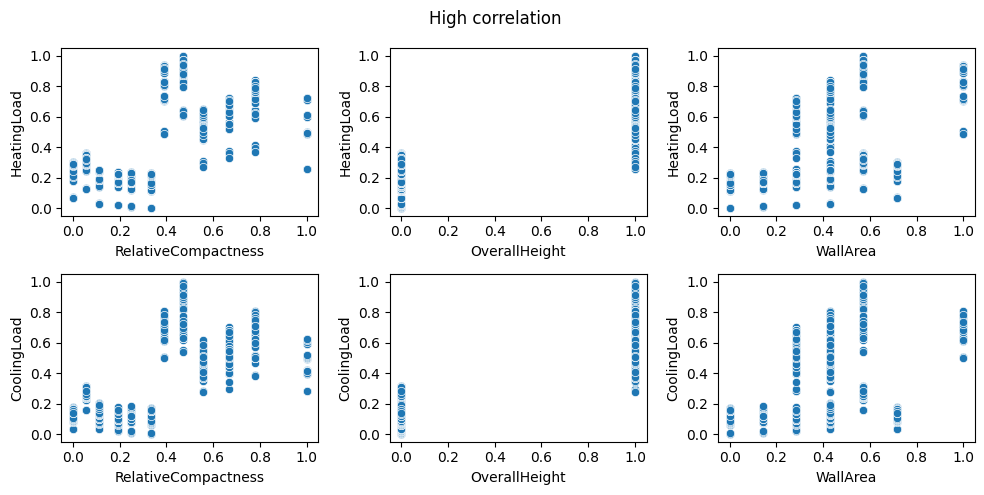

In [13]:
#high correlation
fig, axs = plt.subplots(2,3, figsize=(10,5))

sns.scatterplot(data = df, x = "RelativeCompactness" , y = "HeatingLoad", ax = axs[0,0])
sns.scatterplot(data = df, x = "OverallHeight" , y = "HeatingLoad", ax = axs[0,1])
sns.scatterplot(data = df, x = "WallArea" , y = "HeatingLoad", ax = axs[0,2])

sns.scatterplot(data = df, x = "RelativeCompactness" , y = "CoolingLoad", ax = axs[1,0])
sns.scatterplot(data = df, x = "OverallHeight" , y = "CoolingLoad", ax = axs[1,1])
sns.scatterplot(data = df, x = "WallArea" , y = "CoolingLoad", ax = axs[1,2])

fig.suptitle("High correlation")
plt.tight_layout()


It can be seen somewhat positve linear relationship, thus positive correlation. The Overall heigh and heat/cooling load has the highest correlation and this can be seen in the graph. Relative compactness and wallarea as somewhat lower correlation.

### Scatterplots for values with non/near zero correlation to target values

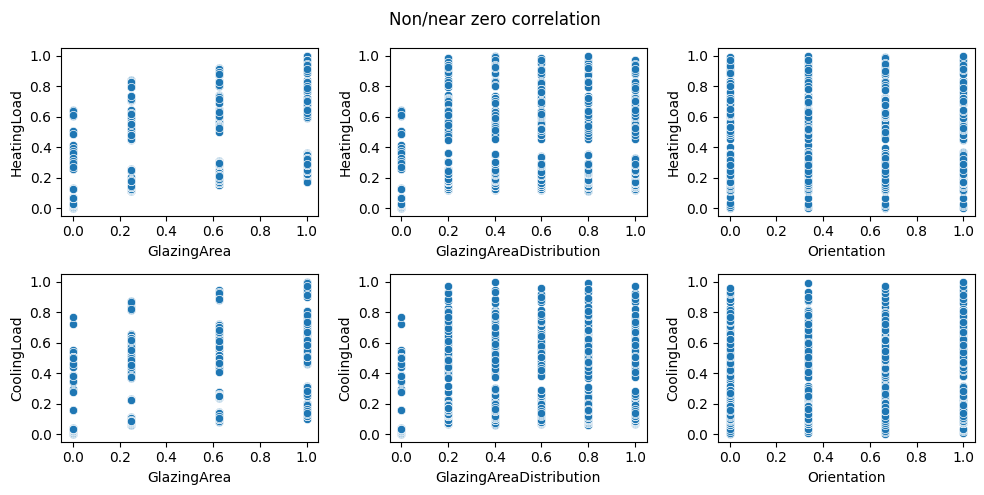

In [14]:
#non/near zero correlation
fig, axs = plt.subplots(2,3, figsize=(10,5))

sns.scatterplot(data = df, x = "GlazingArea" , y = "HeatingLoad", ax = axs[0,0])
sns.scatterplot(data = df, x = "GlazingAreaDistribution" , y = "HeatingLoad", ax = axs[0,1])
sns.scatterplot(data = df, x = "Orientation" , y = "HeatingLoad", ax = axs[0,2])

sns.scatterplot(data = df, x = "GlazingArea" , y = "CoolingLoad", ax = axs[1,0])
sns.scatterplot(data = df, x = "GlazingAreaDistribution" , y = "CoolingLoad", ax = axs[1,1])
sns.scatterplot(data = df, x = "Orientation" , y = "CoolingLoad", ax = axs[1,2])

fig.suptitle("Non/near zero correlation")
plt.tight_layout()

As shown in the correlation tabel, this features does have a low, near zero correlation with both cooling and heating load. This can also be seen in these graphs. A small correlation can also be seen with glazing area, but this is lower than the other with higher correlation. 

### Scatterplots for values with negative zero correlation to target values

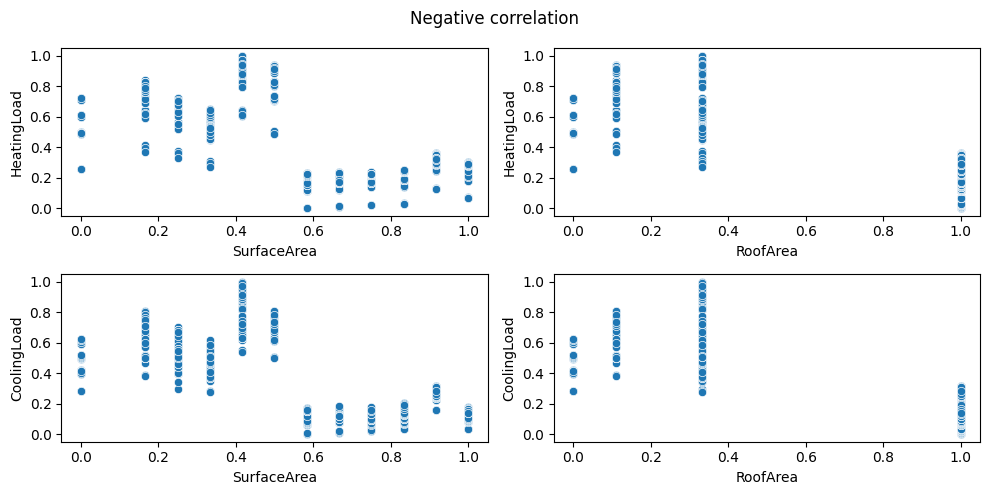

In [15]:
#negative correlation
fig, axs = plt.subplots(2,2, figsize=(10,5))

sns.scatterplot(data = df, x = "SurfaceArea" , y = "HeatingLoad", ax = axs[0,0])
sns.scatterplot(data = df, x = "RoofArea" , y = "HeatingLoad", ax = axs[0,1])


sns.scatterplot(data = df, x = "SurfaceArea" , y = "CoolingLoad", ax = axs[1,0])
sns.scatterplot(data = df, x = "RoofArea" , y = "CoolingLoad", ax = axs[1,1])

fig.suptitle("Negative correlation")
plt.tight_layout()

For both Surface Area and RoofArea does we have a negative correlation. Roofarea has the highest negative correlation. 

### Histograms to see the distribution of the data

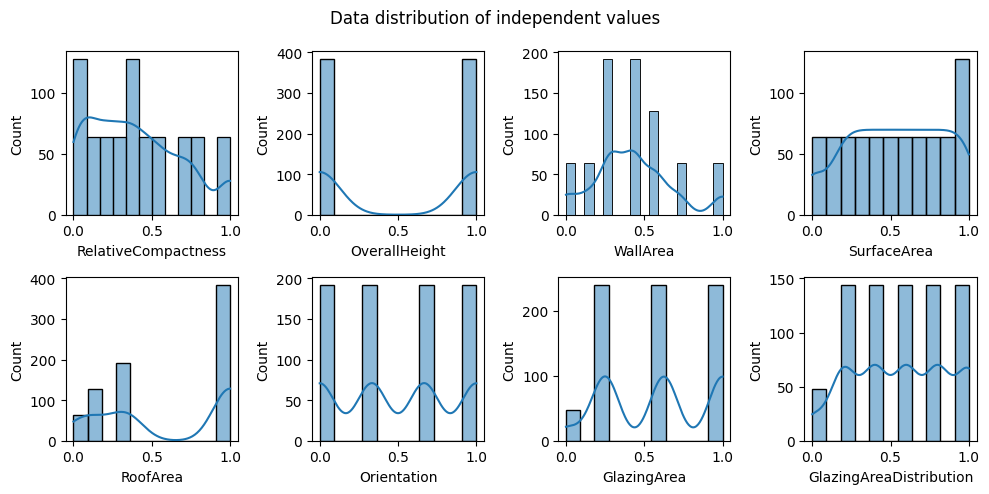

In [16]:
fig, axs = plt.subplots(2,4, figsize=(10,5))

sns.histplot(data = df, x = "RelativeCompactness", ax = axs[0,0], kde = True)
sns.histplot(data = df, x = "OverallHeight", ax = axs[0,1], kde = True)
sns.histplot(data = df, x = "WallArea", ax = axs[0,2], kde = True)
sns.histplot(data = df, x = "SurfaceArea", ax = axs[0,3], kde = True)

sns.histplot(data = df, x = "RoofArea", ax = axs[1,0], kde = True)
sns.histplot(data = df, x = "Orientation", ax = axs[1,1], kde = True)
sns.histplot(data = df, x = "GlazingArea", ax = axs[1,2], kde = True)
sns.histplot(data = df, x = "GlazingAreaDistribution", ax = axs[1,3], kde = True)

plt.suptitle("Data distribution of independent values")

plt.tight_layout()

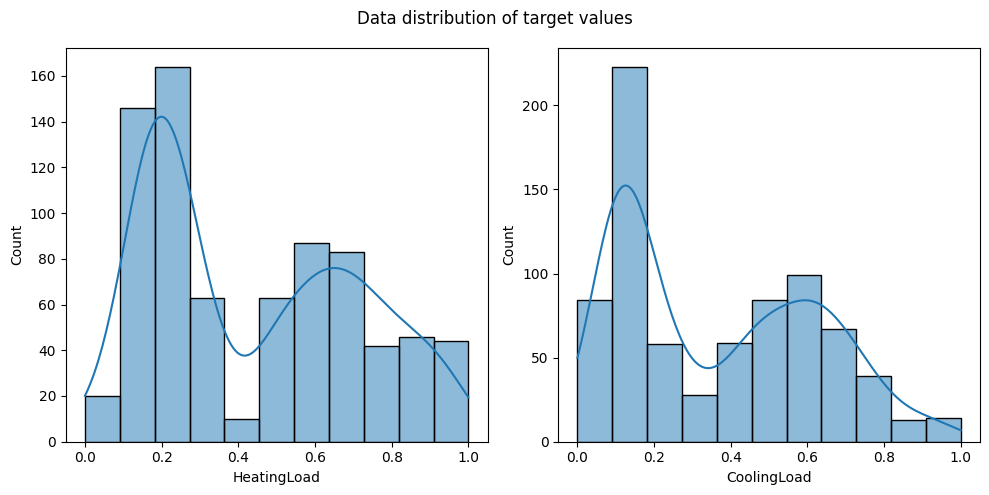

In [17]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

sns.histplot(data = df, x = "HeatingLoad", ax = axs[0], kde = True)
sns.histplot(data = df, x = "CoolingLoad", ax = axs[1], kde = True)

plt.suptitle("Data distribution of target values")

plt.tight_layout()

# Feature Selectriong with RFCV

## Test with RFCV to see if we have any feature that is not affecting the regression

In [18]:
#RFECV will use crossvalidation wiht RFE estimator to get the best fitted features. 
from sklearn.feature_selection import RFECV

#all features for X
x_features = df[["RelativeCompactness","SurfaceArea","WallArea","RoofArea","OverallHeight",
            "Orientation","GlazingArea","GlazingAreaDistribution"]]

y_target = df["HeatingLoad"]

#split data, use corss validation

#create model
reg = LinearRegression()

#RFECV model
selector = RFECV(reg, step = 1, cv = 10)
#train model
selector.fit(x_features, y_target)

print(selector.support_)
print(selector.ranking_)
print(selector.feature_names_in_)

[ True  True  True  True  True False  True False]
[1 1 1 1 1 3 1 2]
['RelativeCompactness' 'SurfaceArea' 'WallArea' 'RoofArea' 'OverallHeight'
 'Orientation' 'GlazingArea' 'GlazingAreaDistribution']


RFECV shows that it is features such as: Realtivecompactness, SurfaceArea, WallArea, RoofArea, Overallheigh and GlazingArea has the largest impact on the model. 

There is two features that is not affecting the model as much with is "orentation" and "Glazing Area Distribution". It is also these that has a correlation around zero. The rest which does affect the regression modell does have either a positive correlation or a negative one.

This will be true for both heatingload and coolingload.

***Sources:*** 

https://machinelearningmastery.com/feature-selection-machine-learning-python/ 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV 

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

# Model selection and evaluation

1. Choose at least two regression models (e.g., linear regression, ridge regression, lasso
regression) based on the dataset's characteristics and the problem at hand.
2. Split the dataset into training and testing sets.
3. Implement the selected models using a scikit-learn library
4. Train the regression models on the training set and evaluate their performance on
the testing set using appropriate metrics (e.g., mean squared error, R-squared).

# Test with model
From the feature selectrion can we see that Orientation and Glazing area distribution does not affect the model thus can be removed. I will just show in the first exemple with heating load that this is in true. 

We can also see from the correlation heatmap that some independent values are correlating with each other, this can affect the result, because if one independent variable change, should the other correlated indpendednt variabale also change. I guess this will affect the change for Y, because not only one variable change, but two or more. Source: https://medium.com/analytics-vidhya/what-is-multicollinearity-and-how-to-remove-it-413c419de2f 

## What is the goal?
I want to predict the heatingload and CoolingLoad for a building based on these 8 features. 

This will be a continuous target value.

## Models:
    
### Ordinary least squeares linear regression:
Will try to minimize the prediction error to find the best fitted line for our data. Works with both simple and multiple linear regression. It will use the least squares error (SSE) to find the best fitted line. Source: https://www.xlstat.com/en/solutions/features/ordinary-least-squares-regression-ols 
        
### Ridg regression:
Also a type of linear regression, but will be good when the data suffer from multicollinearity. This one is choosen because it can solve the problem when we have several independent values that are correlated, also called multicollinearity.

***There are some assumptions for linear regression:***
    
    Linear relationship.
    Normal distribution of residuals.
    Minimal or no multicollinearity. 
    Constant variance for the residuals. 
    Source: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/

By Looking at the EDA can we see taht wee have some linear relationship, There are minimal multicollinearity and this is shown with RFECV. After the evaluation of the models, does it seems like the residuals have a normal distirbution but it is not optimal.(This can bee seen under the models!)

## Ordinary least squeares linear regression

### Predict Heating Load without feature selection

In [19]:
#all features for X
x_features = df[["RelativeCompactness","SurfaceArea","WallArea","RoofArea","OverallHeight",
            "Orientation","GlazingArea","GlazingAreaDistribution"]]

y_target = df["HeatingLoad"]


reg = LinearRegression()

reg.fit(x_features, y_target)


print("r2 scoring")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "r2")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

print(" ")
print("Mean Squared Error")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "neg_mean_squared_error")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

print(" ")
print("Mean absolute Error")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "neg_mean_absolute_error")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

r2 scoring
Mean:  0.8871400259528857
Std:  0.07008326770617505
Intercept -1724678894555.0798
Coefficient:  431169723638.8702
 
Mean Squared Error
Mean:  -0.00766595442628127
Std:  0.004496867078761144
Intercept -1724678894555.0798
Coefficient:  431169723638.8702
 
Mean absolute Error
Mean:  -0.06261812935638275
Std:  0.018031986907892116
Intercept -1724678894555.0798
Coefficient:  431169723638.8702


### Predict Heating Load with feature selection

In [20]:
x_features = df[["RelativeCompactness","SurfaceArea","WallArea","RoofArea","OverallHeight","GlazingArea"]]

y_target = df["HeatingLoad"]


reg = LinearRegression()

reg.fit(x_features, y_target)


print("r2 scoring")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "r2")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

print(" ")
print("Mean Squared Error")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "neg_mean_squared_error")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

print(" ")
print("Mean absolute Error")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "neg_mean_absolute_error")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

r2 scoring
Mean:  0.8944320752830082
Std:  0.06263061892919523
Intercept -266394389636.98218
Coefficient:  88798129879.12807
 
Mean Squared Error
Mean:  -0.007168681390376154
Std:  0.004001316972035685
Intercept -266394389636.98218
Coefficient:  88798129879.12807
 
Mean absolute Error
Mean:  -0.059963350446541976
Std:  0.01744950549531717
Intercept -266394389636.98218
Coefficient:  88798129879.12807


***As we can see will orientation and glazing area distribution not affect the final result of the model. These will not be used in the rest of the modeling part***

### Predicting Cooling Load

In [21]:

x_features = df[["RelativeCompactness","SurfaceArea","WallArea","RoofArea","OverallHeight","GlazingArea"]]

y_target = df["CoolingLoad"]

reg = LinearRegression()

reg.fit(x_features, y_target)

print("r2 scoring")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "r2")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

print(" ")
print("Mean Squared Error")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "neg_mean_squared_error")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

print(" ")
print("Mean absolute error")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "neg_mean_absolute_error")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

r2 scoring
Mean:  0.8770175447482271
Std:  0.030277924753394223
Intercept -1127964869220.3484
Coefficient:  375988289740.2248
 
Mean Squared Error
Mean:  -0.007668086871412069
Std:  0.001769120469459479
Intercept -1127964869220.3484
Coefficient:  375988289740.2248
 
Mean absolute error
Mean:  -0.06195182120935446
Std:  0.008956056785922203
Intercept -1127964869220.3484
Coefficient:  375988289740.2248


### Create plot for both heatingload and coolingloind residuals.

<AxesSubplot: xlabel='resCool', ylabel='Count'>

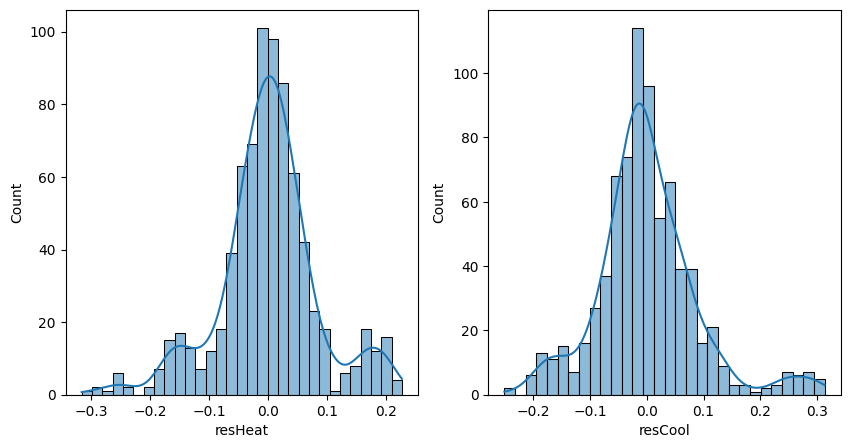

In [22]:

#plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

#predict using corss validation
y_heating = df["HeatingLoad"]
y_cooling = df["CoolingLoad"]

predict_heat = cross_val_predict(reg, x_features, y_heating, cv = 10)
res_heat = y_heating - predict_heat

predict_cooling = cross_val_predict(reg, x_features, y_cooling, cv = 10)
res_cooling = y_cooling - predict_cooling

data = {
    "resHeat": res_heat,
    "resCool": res_cooling
}

df_res = pd.DataFrame(data)

sns.histplot(data, x = "resHeat", ax = ax1, kde = True)
sns.histplot(data, x = "resCool", ax = ax2, kde = True)


The residuals seems to be in a good distribution which could indicate that the model performce well. We see more residuals around zero which indicate that the predictions works relativly good. I guess we always have to assume some deviations. 

## Ridge Regression

### Predict Heat load

In [23]:
x_features = df[["RelativeCompactness","SurfaceArea","WallArea","RoofArea","OverallHeight","GlazingArea"]]

y_target = df["HeatingLoad"]

reg = Ridge()

reg.fit(x_features, y_target)

print("r2 scoring")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "r2")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

print(" ")
print("Mean Squared Error")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "neg_mean_squared_error")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

print(" ")
print("Mean absolute error")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "neg_mean_absolute_error")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

r2 scoring
Mean:  0.8966437259919646
Std:  0.06120026495867089
Intercept 0.25204215210752623
Coefficient:  0.05630305519392681
 
Mean Squared Error
Mean:  -0.00703098500398882
Std:  0.003922795132793003
Intercept 0.25204215210752623
Coefficient:  0.05630305519392681
 
Mean absolute error
Mean:  -0.05933375650065794
Std:  0.016500430280097365
Intercept 0.25204215210752623
Coefficient:  0.05630305519392681


### Predicting Cooling Load

In [24]:

x_features = df[["RelativeCompactness","SurfaceArea","WallArea","RoofArea","OverallHeight","GlazingArea"]]

y_target = df["CoolingLoad"]

reg = Ridge()

reg.fit(x_features, y_target)

print("r2 scoring")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "r2")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

print(" ")
print("Mean Squared Error")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "neg_mean_squared_error")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

print(" ")
print("Mean absolute error")
score = cross_val_score(reg,x_features, y_target, cv = 10, scoring = "neg_mean_absolute_error")
print("Mean: ",score.mean())
print("Std: ",score.std())
print("Intercept", reg.intercept_)
print("Coefficient: ", reg.coef_.mean())

r2 scoring
Mean:  0.8760806560469536
Std:  0.03079403757605141
Intercept 0.22844523000042558
Coefficient:  0.03939033254737544
 
Mean Squared Error
Mean:  -0.007727766145604956
Std:  0.0018005548202695303
Intercept 0.22844523000042558
Coefficient:  0.03939033254737544
 
Mean absolute error
Mean:  -0.06270695417063425
Std:  0.008991533054822542
Intercept 0.22844523000042558
Coefficient:  0.03939033254737544


### Create plot for both heatingload and coolingloind residuals.

<AxesSubplot: xlabel='resCool', ylabel='Count'>

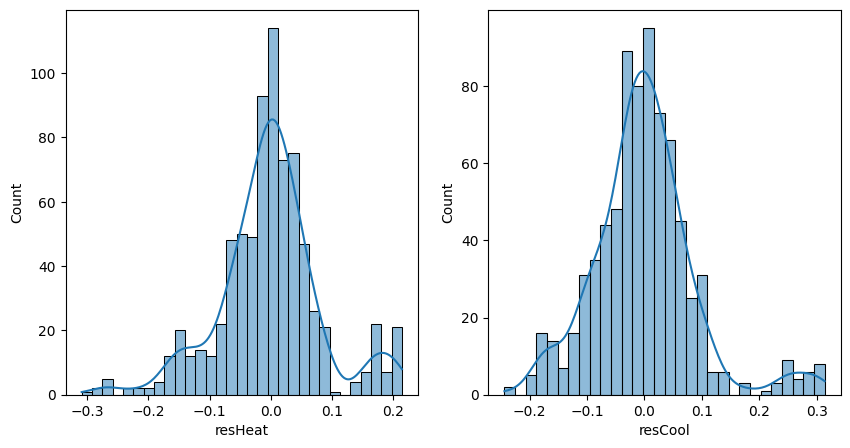

In [25]:

regrid = Ridge()

reg.fit(x_features, y_target)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

y_heating = df["HeatingLoad"]
y_cooling = df["CoolingLoad"]

predict_heat = cross_val_predict(regrid, x_features, y_heating, cv = 10)
res_heat = y_heating - predict_heat

predict_cooling = cross_val_predict(regrid, x_features, y_cooling, cv = 10)
res_cooling = y_cooling - predict_cooling

data = {
    "resHeat": res_heat,
    "resCool": res_cooling
}

df_res = pd.DataFrame(data)

sns.histplot(data, x = "resHeat", ax = ax1, kde = True)
sns.histplot(data, x = "resCool", ax = ax2, kde = True)


Get similar as for Ordinary least squeares linear regression

# Interpretation and Recommendationstions.

1. Interpret the coefficients of the regression models and analyse their significance.
2. Provide insights into the key factors influencing the target variable.
3. Based on your analysis, make recommendations or predictions for future
observations.


### Interpret the coefficients of the regression models and analyse their significancee 

***Ordinary least squeares linear regression:***

For the linear regression can we see that the coefficient are: 547568753848 and positive. This means that regression line should be positive, when the features increase will also the target value increase.

***Ridge Regression***

For the ridge regression model can we see that the coefficient are 0.25 and 0.22 for heatload and coolingload respectivly. These are positive and we can therefore see that for an increase in the indpendent variables an positive increase will occure for the heatload and coolingload. 

***Note for both models***

We can also see from the residual histplots that the distribution of the residuals seems to be relatively good. They have a curve similar to normal distribution and most of the values are around 0. However, there can be seen some more predicted variables in the upper level.


### Provide insights into the key factors influencing the target variable.

The key features that affect the target variable should be those values which has the strongest correlation becuase a stronger correlation would mean that if x increase y will increase proportionally to x. This should then be RelativeCompactness and OverallHeight. 

This can be seen on feauter selection part. 

### Based on your analysis, make recommendations or predictions for future observations.
We are getting similar results for both rigde and Ordinary least squeares linear regression thus in this case could both work. I think it's important to note that ridge regression should work better for correlating independent variables. However, these can be identified and removed by RFCV. 

For the future could these or similar models bee used in maybe constructions or where ventelations are build, to get a better understanding of what affects the heating load and cooling load the most. It could also be used to predict what the heat load and coolingload is for certain buildings, and therefore give better understanding of how we could construct something to maximize/minimize heatload/coolingload etc. 

# Neural Network Integration

1. Choose a suitable neural network architecture for regression analysis. Justify your
choice based on the characteristics of the dataset and the complexity of the problem

    I think the most important thing to justify here is that we have an linear activation function as the final node and that we have one node because we will only predict one value
   322. Implement and train the neural network using TensorFlow or a framework of your
cho
44
3. Compare the performance of the neural network with the traditional regression
models selected earlier. Consider metrics such as mean squared error, R-squared, and
any other relevant evaluation metrics.

### Heatload

In [26]:
x_features = df[["RelativeCompactness","SurfaceArea","WallArea","RoofArea","OverallHeight","GlazingArea"]]

y_target = df["HeatingLoad"]


model_test = tf.keras.Sequential()

model_test.add(layers.Dense(units=20, activation = "relu", input_shape=(6,)))


model_test.add(layers.Dense(units = 1, activation = "linear"))

model_test.compile(optimizer ="adam", loss = "mean_squared_error", metrics=["mae","mse"])


x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.2)

model_test.fit(x_train, y_train, epochs=50, verbose = 0)


res = model_test.evaluate(x_test, y_test, verbose = 0.2)

#predic to get r2
y_pred = model_test.predict(x_test)

r2 = r2_score(y_test, y_pred)

print("Mean square error: ", res[0])
print("Mean absolute error: ", res[1])
print("R2 score: ", r2)





5/5 [==============================] - 0s 2ms/step
Mean square error:  0.006553763058036566
Mean absolute error:  0.05503266304731369
R2 score:  0.9209781844521232


### Coolingload

In [27]:
x_features = df[["RelativeCompactness","SurfaceArea","WallArea","RoofArea","OverallHeight","GlazingArea"]]

y_target = df["CoolingLoad"]


model_test = tf.keras.Sequential()


model_test.add(layers.Dense(units=20, activation = "relu", input_shape=(6,)))

model_test.add(layers.Dense(units = 1, activation = "linear"))

model_test.compile(optimizer ="adam", loss = "mean_squared_error", metrics=["mae","mse"])


x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.2)


model_test.fit(x_train, y_train, epochs=50, verbose = 0)


res = model_test.evaluate(x_test, y_test, verbose = 0.2)


y_pred = model_test.predict(x_test)

r2 = r2_score(y_test, y_pred)

print("Mean square error: ", res[0])
print("Mean absolute error: ", res[1])
print("R2 score: ", r2)

5/5 [==============================] - 0s 2ms/step
Mean square error:  0.007406610995531082
Mean absolute error:  0.05967229977250099
R2 score:  0.8881488252075362


### Compare the performance of the neural network with the traditional regression 

the mean squared error for neural network are around 0.005 (0.006 for coolingload) wi  h50 epochs. For the linear regression was it: -0.007 and for ridge: -0.007. These number are for prediction of heatloading but they are really similar to the coolingload. 
We can therefore, with mean squared error, not see any real difference between the three models.

For mean absolute error do we have 0.038 from the neural network and -0.082 for Ordinary least squeares linear regression and -0.059 (these was for heatloading prediction but are similar for cooling load)

For R2 is it 0.95 for neural network, for Ordinary least squeares linear regression 0.89 and 0.896 for Ridge regression. 

Thus, we can see that the results are similar for all three models, but neural network performs generally a little better I would guess that the Neural Network could potentially work better if we have more data to train the model with. .